# Project 2: Prediction of Ames Housing Sale Price  
--- 
- [EDA and Cleaning](./1_EDA_and_Cleaning.ipynb) 
- <b>Preprocessing and Feature Engineering</b>
- [Model Benchmarks](./3_Model_Benchmarks.ipynb)
- [Model Tuning](./4_Model_Tuning.ipynb)
- [Production Model and Insights](./5_Production_Model_and_Insights.ipynb)

In [1]:
#Importing libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

--- 
## Overview

In this notebook, I will carry out preprocessing and feature engineering based on EDA findings in the previous notebook. 

--- 
## Contents
- [Preprocessing of train dataset](#Preprocessing-of-train-dataset)
- [Preprocessing of test dataset](#Preprocessing-of-test-dataset)
- [Exporting preprocessed data](#Exporting-preprocessed-data) 

---
## Preprocessing of train dataset

In [2]:
#Importing train dataset

train = pd.read_csv('../datasets/train.csv')

In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
#converting column names to lower case and removing space for easier coding 

train.columns = train.columns.str.lower()
train.columns = train.columns.str.replace(' ', '')

### Based on the EDA done in the previous notebook, the following changes will be made:

#### Dealing with null values
- Categorical columns with null values will be filled with 'None'
- Numerical columns with null values will be filled with 0

In [5]:
train._get_numeric_data().fillna(0, inplace=True)
train.fillna('None', inplace=True)
train.isnull().sum()[train.isnull().sum()>0]

Series([], dtype: int64)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
id               2051 non-null int64
pid              2051 non-null int64
mssubclass       2051 non-null int64
mszoning         2051 non-null object
lotfrontage      2051 non-null float64
lotarea          2051 non-null int64
street           2051 non-null object
alley            2051 non-null object
lotshape         2051 non-null object
landcontour      2051 non-null object
utilities        2051 non-null object
lotconfig        2051 non-null object
landslope        2051 non-null object
neighborhood     2051 non-null object
condition1       2051 non-null object
condition2       2051 non-null object
bldgtype         2051 non-null object
housestyle       2051 non-null object
overallqual      2051 non-null int64
overallcond      2051 non-null int64
yearbuilt        2051 non-null int64
yearremod/add    2051 non-null int64
roofstyle        2051 non-null object
roofmatl         2051 non-

#### Drop columns with high % of 0 or None. These columns are have low correlation with sale price and will have minimal impact on sale price.
   - bsmtfinsf2 (high % of 0)
   - miscval (high % of 0)
   - lowqualfinsf (high % of 0)
   - bsmthalfbath (high % of 0)
   - alley (high % of None)
   - fence (high % of None)
   - miscfeature (high % of None)

#### Drop columns with high % of the same value and low correlation with sale price. 
- street
- utilities 
- heating
- bsmtfintype2 
- centralair
- saletype
- bsmtcond
- extercond
- garagequal

In [7]:
train.drop(['bsmtfinsf2', 'miscval', 'lowqualfinsf', 'bsmthalfbath', 'alley', 'fence', 'miscfeature','street', 
            'utilities', 'heating', 'bsmtfintype2', 'centralair', 'saletype', 'bsmtcond', 'extercond','garagequal'],
           axis = 1, inplace = True)

In [8]:
train.columns

Index(['id', 'pid', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea',
       'lotshape', 'landcontour', 'lotconfig', 'landslope', 'neighborhood',
       'condition1', 'condition2', 'bldgtype', 'housestyle', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremod/add', 'roofstyle', 'roofmatl',
       'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea', 'exterqual',
       'foundation', 'bsmtqual', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtunfsf', 'totalbsmtsf', 'heatingqc', 'electrical', '1stflrsf',
       '2ndflrsf', 'grlivarea', 'bsmtfullbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'functional', 'fireplaces', 'fireplacequ', 'garagetype', 'garageyrblt',
       'garagefinish', 'garagecars', 'garagearea', 'garagecond', 'paveddrive',
       'wooddecksf', 'openporchsf', 'enclosedporch', '3ssnporch',
       'screenporch', 'poolarea', 'poolqc', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')

#### Drop 'pid' column as there is already an 'id' column to identify the house



In [9]:
train.drop(['pid'], axis = 1, inplace = True)

#### Drop columns with strong collinearity
- totalbsmtsf
- totrmsabvgrd
- garagecars

In [10]:
train.drop(['totalbsmtsf', 'totrmsabvgrd', 'garagecars'], axis = 1, inplace = True)

In [11]:
train.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'lotshape',
       'landcontour', 'lotconfig', 'landslope', 'neighborhood', 'condition1',
       'condition2', 'bldgtype', 'housestyle', 'overallqual', 'overallcond',
       'yearbuilt', 'yearremod/add', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'masvnrarea', 'exterqual', 'foundation',
       'bsmtqual', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtunfsf',
       'heatingqc', 'electrical', '1stflrsf', '2ndflrsf', 'grlivarea',
       'bsmtfullbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr',
       'kitchenqual', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagearea', 'garagecond', 'paveddrive',
       'wooddecksf', 'openporchsf', 'enclosedporch', '3ssnporch',
       'screenporch', 'poolarea', 'poolqc', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')

#### Drop outliers these columns 
- lotfrontage
- lotarea
- bsmtfinsf1
- grlivarea

In [12]:
train.drop(train[train['lotfrontage'] > 300].index, inplace = True)
train.drop(train[train['lotarea'] > 100000].index, inplace = True)
train.drop(train[train['bsmtfinsf1'] > 3500].index, inplace = True)
train.drop(train[train['grlivarea'] > 4500].index, inplace = True)

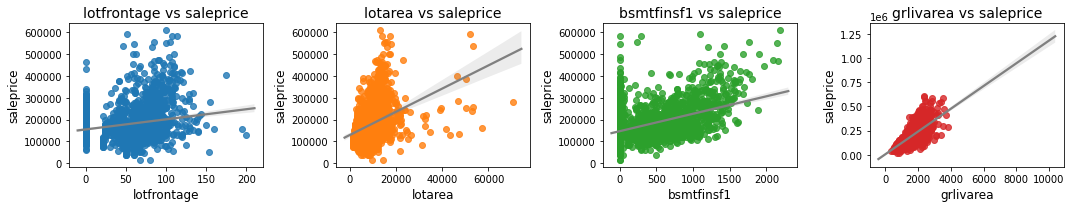

In [13]:
#scatter plots to make sure outliers removed 
def subplot_scatter(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.regplot(x=dataframe[column],y=dataframe['saleprice'], ax=ax[i], line_kws = {'color':'grey'})        
        ax[i].set_title(f'{column} vs saleprice',fontsize=14)  
        ax[i].set_xlabel(column, fontsize=12)
        ax[i].set_ylabel('saleprice', fontsize=12)
    plt.tight_layout()
    
subplot_scatter(train, ['lotfrontage', 'lotarea','bsmtfinsf1','grlivarea'])

#### Convert ordinal categorical columns to numeric columns  
- exterqual
- bsmtqual
- bsmtexposure
- heatingqc
- kitchenqual
- fireplacequ
- garagecond
- lotshape



In [14]:
ordinal_numeric = {'exterqual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
 'bsmtqual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
 'heatingqc': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
 'fireplacequ': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
 'garagecond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
 'bsmtexposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None':0},
 'lotshape': {'IR3': 3, 'IR2': 2, 'IR1': 1, 'Reg': 0},
'kitchenqual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}}     

train.replace(ordinal_numeric, inplace=True)

In [15]:
print(f" exterqual unique values: {train['exterqual'].unique()}")
print(f" bsmtqual unique values: {train['bsmtqual'].unique()}")
print(f" heatingqc unique values: {train['heatingqc'].unique()}")
print(f" fireplacequ unique values: {train['fireplacequ'].unique()}")
print(f" garagecond unique values: {train['garagecond'].unique()}")
print(f" bsmtexposure unique values: {train['bsmtexposure'].unique()}")
print(f" lotshape unique values: {train['lotshape'].unique()}")
print(f" kitchenqual unique values: {train['kitchenqual'].unique()}")

 exterqual unique values: [4 3 5 2]
 bsmtqual unique values: [3 4 2 0 5 1]
 heatingqc unique values: [5 3 4 2 1]
 fireplacequ unique values: [0 3 4 1 5 2]
 garagecond unique values: [3 2 0 1 4 5]
 bsmtexposure unique values: [1 4 3 0 2]
 lotshape unique values: [1 0 2 3]
 kitchenqual unique values: [4 3 2 5]


#### New columns to indicate presence of features
These features seem to have strong positive correlation with sale price. Thus, columns to indicate their presence in the house will be added
- porch
    - drop: 3ssnporch, enclosedporch, openporchsf, screenporch
- pool
    - drop: poolarea, poolqc
- garage
- fireplace
- bsmt
- masvnr



In [16]:
# porch
porch_col = ['3ssnporch','enclosedporch','openporchsf','screenporch']
train['porch'] = train[porch_col].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)
train.drop(porch_col, axis = 1, inplace = True)

train['porch'].unique()

array([1, 0], dtype=int64)

In [17]:
#pool
pool_col = ['poolarea','poolqc']
train['pool'] = train['poolarea'].apply(lambda x: 1 if x > 0 else 0)
train.drop(pool_col, axis = 1, inplace = True)

train['pool'].unique()

array([0, 1], dtype=int64)

In [18]:
#garage, fireplace, bsmt, masvnr
train['garage'] = train['garagearea'].apply(lambda x: 1 if x > 0 else 0)
train['fireplace'] = train['fireplaces'].apply(lambda x: 1 if x > 0 else 0)
train['bsmt'] = train['bsmtqual'].apply(lambda x: 0 if x == 'None' else 1)
train['masvnr'] = train['masvnrarea'].apply(lambda x: 1 if x > 0 else 0)

print(f" garage unique values: {train['garage'].unique()}")
print(f" fireplace unique values: {train['fireplace'].unique()}")
print(f" bsmt unique values: {train['bsmt'].unique()}")
print(f" masvnr unique values: {train['masvnr'].unique()}")

 garage unique values: [1 0]
 fireplace unique values: [0 1]
 bsmt unique values: [1]
 masvnr unique values: [1 0]


#### New columns to show new features
- agesold 
    - Indicate age of house when sold 
- remodelled
    - Indicate if house was remodelled before 
- bighouse 
    - Indicate if house has more than 2 floors 

In [19]:
#agesold
train['agesold'] = train['yrsold']-train['yearbuilt']
print(train['agesold'].unique())
train.head(2)

[ 34  13  57   4 110  44   1  51  55  38  37 129   9   6  92  46  30  39
  18  48  45  71 112  58  28  77  11   2  29  33  43   0  31  54  73  68
  56   5  81  40  41  52  12  88  47  78  82  50  97  93  15  49  87  32
 109   8  91   7  70  62  53  83  74  35 135  98  59  76  27  95  19  36
  89  69  24  65 118  66   3  42 106  10  20  22  99  26  23  60  25  86
  90  21  84  14  63  94  72  67 125 114  61  96  64  17 119  16  80 100
 107  79 101 108 127  85 136 103 128 115 117 111  75 113]


,id,mssubclass,mszoning,lotfrontage,lotarea,lotshape,landcontour,lotconfig,landslope,neighborhood,...,mosold,yrsold,saleprice,porch,pool,garage,fireplace,bsmt,masvnr,agesold
0,109,60,RL,0.0,13517,1,Lvl,CulDSac,Gtl,Sawyer,...,3,2010,130500,1,0,1,0,1,1,34
1,544,60,RL,43.0,11492,1,Lvl,CulDSac,Gtl,SawyerW,...,4,2009,220000,1,0,1,1,1,1,13


In [20]:
#remodelled
train['remodelled'] = np.where(train['yearremod/add'] == train['yearbuilt'], 1, 0)
print(train['remodelled'].unique())
train.drop(['yearremod/add'], axis = 1, inplace = True)
train.head(2)

[0 1]


,id,mssubclass,mszoning,lotfrontage,lotarea,lotshape,landcontour,lotconfig,landslope,neighborhood,...,yrsold,saleprice,porch,pool,garage,fireplace,bsmt,masvnr,agesold,remodelled
0,109,60,RL,0.0,13517,1,Lvl,CulDSac,Gtl,Sawyer,...,2010,130500,1,0,1,0,1,1,34,0
1,544,60,RL,43.0,11492,1,Lvl,CulDSac,Gtl,SawyerW,...,2009,220000,1,0,1,1,1,1,13,0


In [21]:
#bighouse
train['bighouse'] = np.where(train['1stflrsf']+train['2ndflrsf'] == train['grlivarea'], 0, 1)
print(train['bighouse'].unique())
train.head(2)

[0 1]


,id,mssubclass,mszoning,lotfrontage,lotarea,lotshape,landcontour,lotconfig,landslope,neighborhood,...,saleprice,porch,pool,garage,fireplace,bsmt,masvnr,agesold,remodelled,bighouse
0,109,60,RL,0.0,13517,1,Lvl,CulDSac,Gtl,Sawyer,...,130500,1,0,1,0,1,1,34,0,0
1,544,60,RL,43.0,11492,1,Lvl,CulDSac,Gtl,SawyerW,...,220000,1,0,1,1,1,1,13,0,0


#### Drop columns 
- garageyrblt
- 1stflrsf

In [22]:
train.drop(['garageyrblt', '1stflrsf'], axis = 1, inplace = True)
train.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'lotshape',
       'landcontour', 'lotconfig', 'landslope', 'neighborhood', 'condition1',
       'condition2', 'bldgtype', 'housestyle', 'overallqual', 'overallcond',
       'yearbuilt', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd',
       'masvnrtype', 'masvnrarea', 'exterqual', 'foundation', 'bsmtqual',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtunfsf', 'heatingqc',
       'electrical', '2ndflrsf', 'grlivarea', 'bsmtfullbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'functional',
       'fireplaces', 'fireplacequ', 'garagetype', 'garagefinish', 'garagearea',
       'garagecond', 'paveddrive', 'wooddecksf', 'mosold', 'yrsold',
       'saleprice', 'porch', 'pool', 'garage', 'fireplace', 'bsmt', 'masvnr',
       'agesold', 'remodelled', 'bighouse'],
      dtype='object')

Add new column
- 2ndflr 

Drop 
- 2ndflrsf

In [23]:
#2ndflr
train['2ndflr'] = train['2ndflrsf'].apply(lambda x: 1 if x > 0 else 0)
train.drop(['2ndflrsf'], axis = 1, inplace = True)
print(f" 2ndflr unique values: {train['2ndflr'].unique()}")

 2ndflr unique values: [1 0]


#### Modifications to columns
- landslope
    - group Sev with Mod into new 'sloped' value
    - if Gtl, will reflect as flat

In [24]:
train['landslope'] = train['landslope'].apply(lambda x: 'flat' if x == 'Gtl' else 'sloped')
train['landslope'].value_counts()

flat      1951
sloped      95
Name: landslope, dtype: int64

#### Convert mssubclass to string instead of float as it is categorical

In [25]:
train['mssubclass'] = train['mssubclass'].apply(str)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 2050
Data columns (total 61 columns):
id              2046 non-null int64
mssubclass      2046 non-null object
mszoning        2046 non-null object
lotfrontage     2046 non-null float64
lotarea         2046 non-null int64
lotshape        2046 non-null int64
landcontour     2046 non-null object
lotconfig       2046 non-null object
landslope       2046 non-null object
neighborhood    2046 non-null object
condition1      2046 non-null object
condition2      2046 non-null object
bldgtype        2046 non-null object
housestyle      2046 non-null object
overallqual     2046 non-null int64
overallcond     2046 non-null int64
yearbuilt       2046 non-null int64
roofstyle       2046 non-null object
roofmatl        2046 non-null object
exterior1st     2046 non-null object
exterior2nd     2046 non-null object
masvnrtype      2046 non-null object
masvnrarea      2046 non-null float64
exterqual       2046 non-null object
foundatio

---
## Preprocessing of test dataset

#### I will repeat the steps I took for preprocessing the train dataset, except removing outliers to preserve number of rows in test dataframe

In [27]:
#Importing test dataset
test = pd.read_csv('../datasets/test.csv')

In [28]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       719 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              58 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof M

In [30]:
#converting column names to lower case and removing space for easier coding 

test.columns = test.columns.str.lower()
test.columns = test.columns.str.replace(' ', '')

In [31]:
#replace null values with 0 for numeric columns and None for categorical columns
test._get_numeric_data().fillna(0, inplace=True)
test.fillna('None', inplace=True)
test.isnull().sum()[test.isnull().sum()>0]

Series([], dtype: int64)

In [32]:
#drop numeric and categorical cols with high % of 0, None, same values and low corr with saleprice
test.drop(['bsmtfinsf2', 'miscval', 'lowqualfinsf', 'bsmthalfbath', 'alley', 'fence', 'miscfeature','street', 
            'utilities', 'heating', 'bsmtfintype2', 'centralair', 'saletype', 'bsmtcond', 'extercond','garagequal'],
           axis = 1, inplace = True)

#drop pid column
test.drop(['pid'], axis = 1, inplace = True)

#drop high collinearity columns
test.drop(['totalbsmtsf', 'totrmsabvgrd', 'garagecars'], axis = 1, inplace = True)

#convert ordinal to numeric 
ordinal_numeric = {'exterqual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
 'bsmtqual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
 'heatingqc': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
 'fireplacequ': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
 'garagecond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
 'bsmtexposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None':0},
'kitchenqual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
 'lotshape': {'IR3': 3, 'IR2': 2, 'IR1': 1, 'Reg': 0}}     
test.replace(ordinal_numeric, inplace=True)

# porch
porch_col = ['3ssnporch','enclosedporch','openporchsf','screenporch']
test['porch'] = test[porch_col].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)
test.drop(porch_col, axis = 1, inplace = True)

#pool
pool_col = ['poolarea','poolqc']
test['pool'] = test['poolarea'].apply(lambda x: 1 if x > 0 else 0)
test.drop(pool_col, axis = 1, inplace = True)

#garage, fireplace, bsmt, masvnr
test['garage'] = test['garagearea'].apply(lambda x: 1 if x > 0 else 0)
test['fireplace'] = test['fireplaces'].apply(lambda x: 1 if x > 0 else 0)
test['bsmt'] = test['bsmtqual'].apply(lambda x: 0 if x == 'None' else 1)
test['masvnr'] = test['masvnrarea'].apply(lambda x: 1 if x > 0 else 0)

#agesold
test['agesold'] = test['yrsold']-test['yearbuilt']

#remodelled
test['remodelled'] = np.where(test['yearremod/add'] == test['yearbuilt'], 1, 0)
test.drop(['yearremod/add'], axis = 1, inplace = True)

#bighouse
test['bighouse'] = np.where(test['1stflrsf']+test['2ndflrsf'] == test['grlivarea'], 0, 1)
print(test['bighouse'].unique())
train.head(2)

#Drop garageyrblt, 1stflrsf columns 
test.drop(['garageyrblt', '1stflrsf'], axis = 1, inplace = True)

#Add new 2ndflr column, drop 2ndflrsf
test['2ndflr'] = test['2ndflrsf'].apply(lambda x: 1 if x > 0 else 0)
test.drop(['2ndflrsf'], axis = 1, inplace = True)

#Modification to landslope columns (flat and sloped)
test['landslope'] = test['landslope'].apply(lambda x: 'flat' if x == 'Gtl' else 'sloped')

# Convert mssubclass to string instead of float as it is categorical
test['mssubclass'] = test['mssubclass'].apply(str)

test.info()

[0 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 60 columns):
id              879 non-null int64
mssubclass      879 non-null object
mszoning        879 non-null object
lotfrontage     879 non-null float64
lotarea         879 non-null int64
lotshape        879 non-null int64
landcontour     879 non-null object
lotconfig       879 non-null object
landslope       879 non-null object
neighborhood    879 non-null object
condition1      879 non-null object
condition2      879 non-null object
bldgtype        879 non-null object
housestyle      879 non-null object
overallqual     879 non-null int64
overallcond     879 non-null int64
yearbuilt       879 non-null int64
roofstyle       879 non-null object
roofmatl        879 non-null object
exterior1st     879 non-null object
exterior2nd     879 non-null object
masvnrtype      879 non-null object
masvnrarea      879 non-null float64
exterqual       879 non-null object
foundation      879 non-null 

--- 
## Exporting preprocessed data 

The preprocessed data will be exported as .csv files and used on the next notebook (Model Tuning)

In [33]:
train_preprocessed = train
train_preprocessed.to_csv('../datasets/train_preprocessed.csv', index=False)
test_preprocessed = test
test_preprocessed.to_csv('../datasets/test_preprocessed.csv', index=False)